# 12. Derivasjon og integrasjon 

## Derivasjon av funksjoner 

### Oppgave 1 

I numerisk derivasjon tilnærmer vi grenseverdien med en liten verdi $\Delta x$. Vi tilnærmer altså følgende uttrykk:

$$ f'(x) = lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - f(x)}{\Delta x} $$

med

$$ f'(x) \approx \frac{f(x+\Delta x) - f(x)}{\Delta x} $$

der $\Delta x$ er et lite tall.

### Oppgave 2

Ved en for stor $\Delta x$ er tilnærmingen til den deriverte ikke god nok, i og med at $\Delta x$ bør være så nær 0 som mulig. Men en for liten $\Delta x$ gir avrundingsfeil i datamaskinen, og vi må derfor velge en nokså, men ikke altfor, liten $\Delta x$ (ofte rundt $10^{-8}$).

### Oppgave 3

Feilen oppstår på grunn av det vi har drøftet i oppgave 12.6.2.

In [1]:
def f(x):
    return x**2

def f_der(x):
    return 2*x

def deriver(f,x,dx=1E-8):
    dy = f(x+dx) - f(x)
    return dy/dx

x = 1
analytisk = f_der(x)
numerisk = deriver(f,x)
relativ_feil = abs(analytisk-numerisk)/analytisk * 100

print("Relativ feil:", relativ_feil, "prosent.")

Relativ feil: 6.07747097092215e-07 prosent.


## Derivasjon av diskrete data

### Oppgave 4

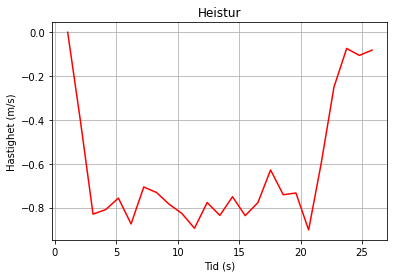

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Leser av fila
data = np.loadtxt('../datasett/heistur.csv', delimiter = ',', skiprows = 1)
t = data[:,0]
h = data[:,2]

# Derivasjonsvariabler
n = len(t)
v = np.zeros(n)
a = np.zeros(n)
v[0] = 0

# Derivasjonsløkke
for i in range(0, n-1):
    v[i+1] = (h[i+1] - h[i])/(t[i+1] - t[i])
    
plt.plot(t, v, color = 'red')
plt.title('Heistur')
plt.xlabel('Tid (s)')
plt.ylabel('Hastighet (m/s)')
plt.grid()
plt.show()

### Oppgave 5

Når vi deriverer et bilde, regner vi ut forskjellen i lysverdi til røde, grønne og blå piksler som er nær hverandre.Dersom forskjellen er stor, får vi en høy verdi, som resulterer i en lys piksel dersom vi plotter den deriverte. Områder med høy kontrast mellom pikslene/stor variasjon i lysverdi, vil da framheves på det deriverte bildet. 

Det at en kan finne forskjellen i to nærliggende verdier er en praktisk anvendelse av derivasjon som kan underbygge derivasjon som endring/forskjeller istedenfor fokus på derivasjonsregler.

### Oppgave 6
Vi deriverer kun bestemte verdier på en datamaskin. Datamaskinen finner ikke generelle, kontinuerlige uttrykk fordi den i bunnen opererer med konkrete tallverdier. Derfor må vi velge ut konkrete tallverdier som datamaskinen kan jobbe med. Når vi deriverer analytisk, gjør vi symbolske utregninger som gir et nytt uttrykk, ikke bare konkrete verdier av dette uttrykket.


## Bestemt integrasjon av funksjoner

### Oppgave 7 
Se boka. Her er poenget å tegne en graf og forklare hvordan bestemt integrasjon og arealet under en graf henger sammen med hverandre, og hvordan dette kan tilnærmes med rektangler.

### Oppgave 8
Se boka seksjon 12.3.2.

### Oppgave 9

In [6]:
def f(x):               #Definerer en funksjon som vi skal integrere.
    return x**3
    
def f_analytisk(x):     #Definerer analytisk verdi for sammenligning.
    return (1/4)*x**4

def trapesmetoden(f, a, b, n):
    h = (b-a)/n
    total = (f(a) + f(b))/2.0
    for k in range(1, n):
        total += f(a + k*h)
    return h*total
    
numerisk = trapesmetoden(f, 0, 5, 100)
analytisk = f_analytisk(5)-f_analytisk(1)
absolutt_feil = abs(analytisk-numerisk)

print("Numerisk verdi:", numerisk)
print("Analytisk verdi:", analytisk)
print("Absolutt feil er:", absolutt_feil)

Numerisk verdi: 156.26562500000003
Analytisk verdi: 156.0
Absolutt feil er: 0.2656250000000284


Feilen oppstår spesielt fordi deler av trapesene havner utenfor grafen.

### Oppgave 10
Eksperimenter med programmet i 12.6.9 ved å bytte ut n, f og integrasjonsmetoden. Skriv gjerne ut tabeller som sammenlikner, for eksempel slik:

In [7]:
def f(x):               #Definerer en funksjon som vi skal integrere.
    return x**3 + 2*x
    
def f_analytisk(x):     #Definerer analytisk verdi for sammenligning.
    return (1/4)*x**4 + x**2

def trapesmetoden(f, a, b, n):
    h = (b-a)/n
    total = (f(a) + f(b))/2.0
    for k in range(1, n):
        total += f(a + k*h)
    return h*total

def rektangelmetoden(f, a, b, n):
    Areal = 0.0
    bredde = (b-a)/n
    for k in range (0, n):
        Areal = Areal + f(a + (k*bredde))*bredde
    return Areal

analytisk = f_analytisk(5)-f_analytisk(1)

for n in [1, 10,100,1000,10000,100000]:
    trapes = trapesmetoden(f, 0, 5, n)
    rektangel = rektangelmetoden(f, 0, 5, n)
    absolutt_feil_trap = abs(analytisk-trapes)
    absolutt_feil_rekt = abs(analytisk-rektangel)
    
    print("For n =",n)
    print("----------------------")
    print("Analytisk verdi:", analytisk)
    
    print("Numerisk verdi for rektangelmetoden:", rektangel)
    print("Numerisk verdi for trapesmetoden:", trapes)
   
    print("Absolutt feil for rektangelmetoden er:", absolutt_feil_rekt)
    print("Absolutt feil for trapesmetoden er:", absolutt_feil_trap)
    print("----------------------")

    


For n = 1
----------------------
Analytisk verdi: 180.0
Numerisk verdi for rektangelmetoden: 0.0
Numerisk verdi for trapesmetoden: 337.5
Absolutt feil for rektangelmetoden er: 180.0
Absolutt feil for trapesmetoden er: 157.5
----------------------
For n = 10
----------------------
Analytisk verdi: 180.0
Numerisk verdi for rektangelmetoden: 149.0625
Numerisk verdi for trapesmetoden: 182.8125
Absolutt feil for rektangelmetoden er: 30.9375
Absolutt feil for trapesmetoden er: 2.8125
----------------------
For n = 100
----------------------
Analytisk verdi: 180.0
Numerisk verdi for rektangelmetoden: 177.89062500000003
Numerisk verdi for trapesmetoden: 181.26562500000003
Absolutt feil for rektangelmetoden er: 2.1093749999999716
Absolutt feil for trapesmetoden er: 1.2656250000000284
----------------------
For n = 1000
----------------------
Analytisk verdi: 180.0
Numerisk verdi for rektangelmetoden: 180.9126562499999
Numerisk verdi for trapesmetoden: 181.25015625000003
Absolutt feil for rektan